In [1]:
import sys  
sys.path.append("../")

In [2]:
import modules as nn
from initializers import Xavier
from losses import LossMSE as MSE
from activations import *
from utils import *

In [3]:
import torch
torch.set_grad_enabled(False)

In [4]:
import matplotlib.pyplot as plt

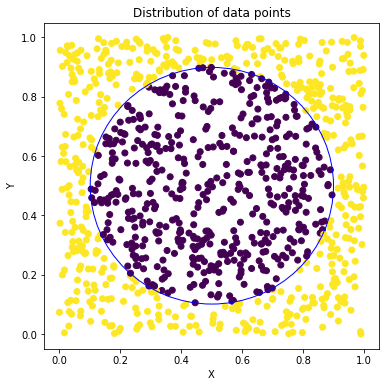

In [5]:
data, labels = get_data(1000)
#Plot the distribution of the generated data, to see how it looks like
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.scatter(data[:,0].tolist(), data[:,1].tolist(), c = labels.tolist())
ax.add_patch(plt.Circle((0.5, 0.5), 1 / (math.sqrt(2*math.pi)), color='b', fill=False))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribution of data points")
plt.savefig('disk_data.png')
plt.show()

In [6]:
INPUT_UNITS = 2
HIDDEN_LAYERS = 3
HIDDEN_UNITS = 25
OUTPUT_UNITS = 2

In [7]:
# Generate the data
X_train, y_train = get_data(1000)
X_test, y_test = get_data(1000)

### Training the model and testing it at each epoch:

In [8]:
# Train the model
lrs = [0.01, 0.015, 0.04]
stats = [] 
for lr in lrs:
    print(f"Traininng model with lr={lr}:")
    # The model
    model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
                            
    _, train_loss, train_acc, test_loss, test_acc = train_test_model(model,X_train,y_train,X_test,y_test,lr=lr)
    stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng model with lr=0.01:
Epoch 1: train loss=0.2741, train acccuracy=47.10% | test loss=0.2558, test acccuracy=50.40%
Epoch 5: train loss=0.2509, train acccuracy=47.00% | test loss=0.2530, test acccuracy=50.40%
Epoch 10: train loss=0.2444, train acccuracy=47.00% | test loss=0.2471, test acccuracy=50.40%
Epoch 15: train loss=0.1829, train acccuracy=47.00% | test loss=0.2090, test acccuracy=50.40%
Epoch 20: train loss=0.0823, train acccuracy=47.00% | test loss=0.0932, test acccuracy=50.40%
Epoch 25: train loss=0.0568, train acccuracy=47.00% | test loss=0.0479, test acccuracy=50.40%
Epoch 30: train loss=0.0480, train acccuracy=47.00% | test loss=0.0433, test acccuracy=50.40%
Epoch 35: train loss=0.0439, train acccuracy=51.10% | test loss=0.0454, test acccuracy=60.80%
Epoch 40: train loss=0.0388, train acccuracy=57.40% | test loss=0.0499, test acccuracy=65.90%
Epoch 45: train loss=0.0365, train acccuracy=61.60% | test loss=0.0522, test acccuracy=68.60%
Epoch 50: train loss=0.0364, tra

### Validation at each epoch (split train data into 70% training and 30% validating):

In [9]:
X_train, y_train, X_val, y_val = split_data(X_train,y_train)

In [10]:
val_stats = [] 
for lr in lrs:
    print(f"Traininng model with lr={lr}:")
    # The model (initalize weights)
    model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
                            
    _, train_loss, train_acc, val_loss, val_acc = train_model(model,X_train,y_train,X_val,y_val,lr=lr)
    val_stats.append([train_loss, train_acc, val_loss, val_acc])
    print("-"*120)

Traininng model with lr=0.01:
Epoch 1: train loss=0.2600, train acccuracy=48.00% | validation loss=0.1053, validation acccuracy=44.67%
Epoch 5: train loss=0.2348, train acccuracy=48.00% | validation loss=0.0977, validation acccuracy=44.67%
Epoch 10: train loss=0.1921, train acccuracy=48.00% | validation loss=0.0743, validation acccuracy=44.67%
Epoch 15: train loss=0.1501, train acccuracy=48.00% | validation loss=0.0550, validation acccuracy=44.67%
Epoch 20: train loss=0.0795, train acccuracy=48.00% | validation loss=0.0279, validation acccuracy=44.67%
Epoch 25: train loss=0.0564, train acccuracy=56.71% | validation loss=0.0231, validation acccuracy=51.00%
Epoch 30: train loss=0.0481, train acccuracy=64.71% | validation loss=0.0195, validation acccuracy=58.33%
Epoch 35: train loss=0.0435, train acccuracy=68.43% | validation loss=0.0154, validation acccuracy=66.33%
Epoch 40: train loss=0.0412, train acccuracy=71.14% | validation loss=0.0147, validation acccuracy=71.00%
Epoch 45: train lo

We can see that the best learning rate is `lr=0.01`, let's train a model given that learning rate and test it.

In [11]:
lr=0.01
model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                      LeakyReLU(),
                      nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                      LeakyReLU(),
                      nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                      LeakyReLU(),
                      nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                      Sigmoid()
                     )
print(f"Training with lr={lr}")
trained_model, train_loss, train_acc, val_loss, val_acc = train_model(model,X_train,y_train,X_val,y_val,
                                                                      lr=lr,verbose=False)

Training with lr=0.01


In [12]:
test_loss, test_acc = test_model(trained_model, X_test, y_test)

Test loss=0.0487, test accuracy=86.00


----

## Torch:

In [13]:
X_train, y_train = get_data(1000)
X_test, y_test = get_data(1000)

In [14]:
torch.set_grad_enabled(True)

In [15]:
# Train the model
torch_stats = []
for lr in lrs:
    print(f"Traininng PyTorch model with lr={lr}:")
    # The model
    torch_model = torch.nn.Sequential(torch.nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                            torch.nn.Sigmoid()
                            )
    _, train_loss, train_acc, test_loss, test_acc = torch_train_test_model(torch_model, X_train, y_train, X_test, y_test)
    torch_stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng PyTorch model with lr=0.01:
Epoch 1: train loss=0.1799, train acccuracy=49.40% | test loss=0.1413, test acccuracy=49.80%
Epoch 5: train loss=0.1253, train acccuracy=49.40% | test loss=0.1250, test acccuracy=49.80%
Epoch 10: train loss=0.1243, train acccuracy=49.40% | test loss=0.1242, test acccuracy=49.80%
Epoch 15: train loss=0.1231, train acccuracy=49.40% | test loss=0.1231, test acccuracy=49.80%
Epoch 20: train loss=0.1204, train acccuracy=49.40% | test loss=0.1207, test acccuracy=49.80%
Epoch 25: train loss=0.1142, train acccuracy=49.40% | test loss=0.1148, test acccuracy=49.80%
Epoch 30: train loss=0.0906, train acccuracy=49.40% | test loss=0.0865, test acccuracy=49.80%
Epoch 35: train loss=0.0486, train acccuracy=49.40% | test loss=0.0440, test acccuracy=49.80%
Epoch 40: train loss=0.0329, train acccuracy=49.40% | test loss=0.0303, test acccuracy=49.80%
Epoch 45: train loss=0.0262, train acccuracy=50.10% | test loss=0.0235, test acccuracy=50.40%
Epoch 50: train loss=0.0

## Visualization:

### Epoch train + test:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
stats_np = np.array(stats)
stats_np.shape

(3, 4, 150)

In [18]:
torch_stats_np = np.array(torch_stats)
torch_stats_np.shape #(lr, [train_loss, train_acc, test_loss, test_acc], epochs)

(3, 4, 150)

In [36]:
def plots_results(results,torch_results,lrs):
    
    lrs_colors = ['b', 'g', 'm']
    
    fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2,figsize= (20,18))
    
    ax1.sharey(ax2)
    ax3.sharey(ax4)
    
    for ind,lr in enumerate(lrs):
        
        ax1.plot(results[ind][0], color = lrs_colors[ind], label = f'training loss with lr={lrs[ind]}')
        ax3.plot(results[ind][1], color = lrs_colors[ind], label = f'training accuracy  with lr={lrs[ind]}')
        
        ax2.plot(torch_results[ind][0], color = lrs_colors[ind], label = f'training loss with lr={lrs[ind]}')
        ax4.plot(torch_results[ind][1], color = lrs_colors[ind], label = f'training accuracy  with lr={lrs[ind]}')
        
        
    ax1.set_title('Training Mean Square Error ',{'fontsize':18})
    ax1.set_xlabel("Epochs",{'fontsize':18})
    ax1.set_ylabel("MSE",{'fontsize':18})
    
    ax2.set_title('(PyTorch) Training Mean Square Error ',{'fontsize':18})
    ax2.set_xlabel("Epochs",{'fontsize':18})
    ax2.set_ylabel("MSE",{'fontsize':18})

    ax3.set_title('Training accuracy ',{'fontsize':18})
    ax3.set_xlabel("Epochs",{'fontsize':18})
    ax3.set_ylabel("Accuracy",{'fontsize':18})

    ax4.set_title('(PyTorch) Training accuracy ',{'fontsize':18})
    ax4.set_xlabel("Epochs",{'fontsize':18})
    ax4.set_ylabel("Accuracy",{'fontsize':18})
    
    ax1.legend(loc = 'upper right',fontsize= 'large')
    ax2.legend(loc = 'upper right',fontsize= 'large')
    ax3.legend(loc = 'upper left',fontsize= 'large')
    ax4.legend(loc = 'upper left',fontsize= 'large')
    plt.tight_layout()
    plt.savefig("results_final.png")
    plt.show()

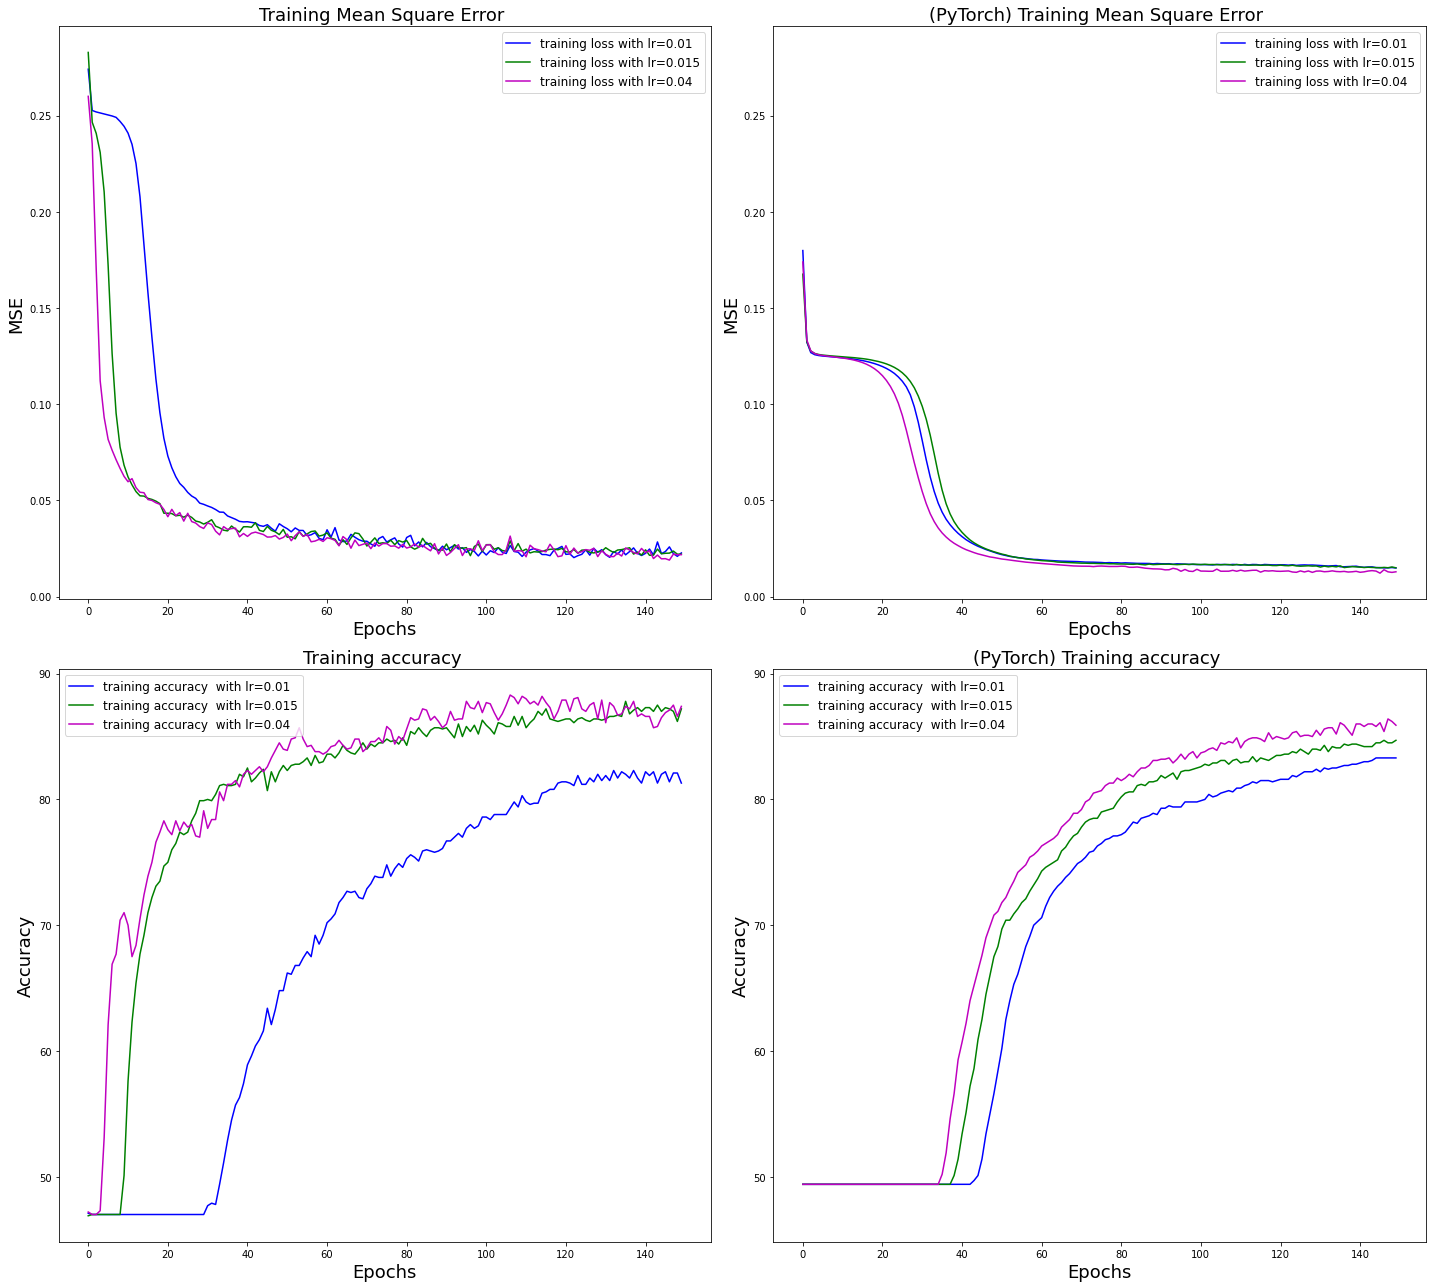

In [37]:
plots_results(stats_np, torch_stats_np,lrs)

### Training withh validation and then testing:

In [21]:
np.array(val_stats).shape

(3, 4, 150)

In [40]:
def val_plots_results(val_stats,lrs):
    # val_stats = [train_loss, train_acc, val_loss, val_acc]
    lrs_colors = ['b', 'g', 'm']
    
    fig, ((ax1, ax2),(ax3,ax4))  = plt.subplots(2, 2, figsize= (24,18))
    ax1.sharey(ax2)
    ax3.sharey(ax4)
    
    for ind,lr in enumerate(lrs):
        ax1.plot(val_stats[ind][0], color = lrs_colors[ind], linestyle="dashed", label = f'training loss with lr={lrs[ind]}')
        ax2.plot(val_stats[ind][2], color = lrs_colors[ind], label = f'validation loss with lr={lrs[ind]}')
        
        ax3.plot(val_stats[ind][1], color = lrs_colors[ind], linestyle="dashed", label = f'training accuracy with lr={lrs[ind]}')
        ax4.plot(val_stats[ind][3], color = lrs_colors[ind], label = f'validation accuracy with lr={lrs[ind]}')
     
    ax1.set_title('Training Mean Square Error ',{'fontsize':18})
    ax1.set_xlabel("Epochs",{'fontsize':18})
    ax1.set_ylabel("MSE",{'fontsize':18})
    
    ax2.set_title('Validation Mean Square Error ',{'fontsize':18})
    ax2.set_xlabel("Epochs",{'fontsize':18})
    ax2.set_ylabel("MSE",{'fontsize':18})
    
    ax3.set_title('Training Accuracy ',{'fontsize':18})
    ax3.set_xlabel("Epochs",{'fontsize':18})
    ax3.set_ylabel("Accuracy",{'fontsize':18})
    
    ax4.set_title('Validation Accuracy ',{'fontsize':18})
    ax4.set_xlabel("Epochs",{'fontsize':18})
    ax4.set_ylabel("Accuracy",{'fontsize':18})
    
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper left')
    
    ax3.legend(loc = 'upper right')
    ax4.legend(loc = 'upper left')
    plt.savefig("val_results_final.png")
    plt.tight_layout()
    plt.show()

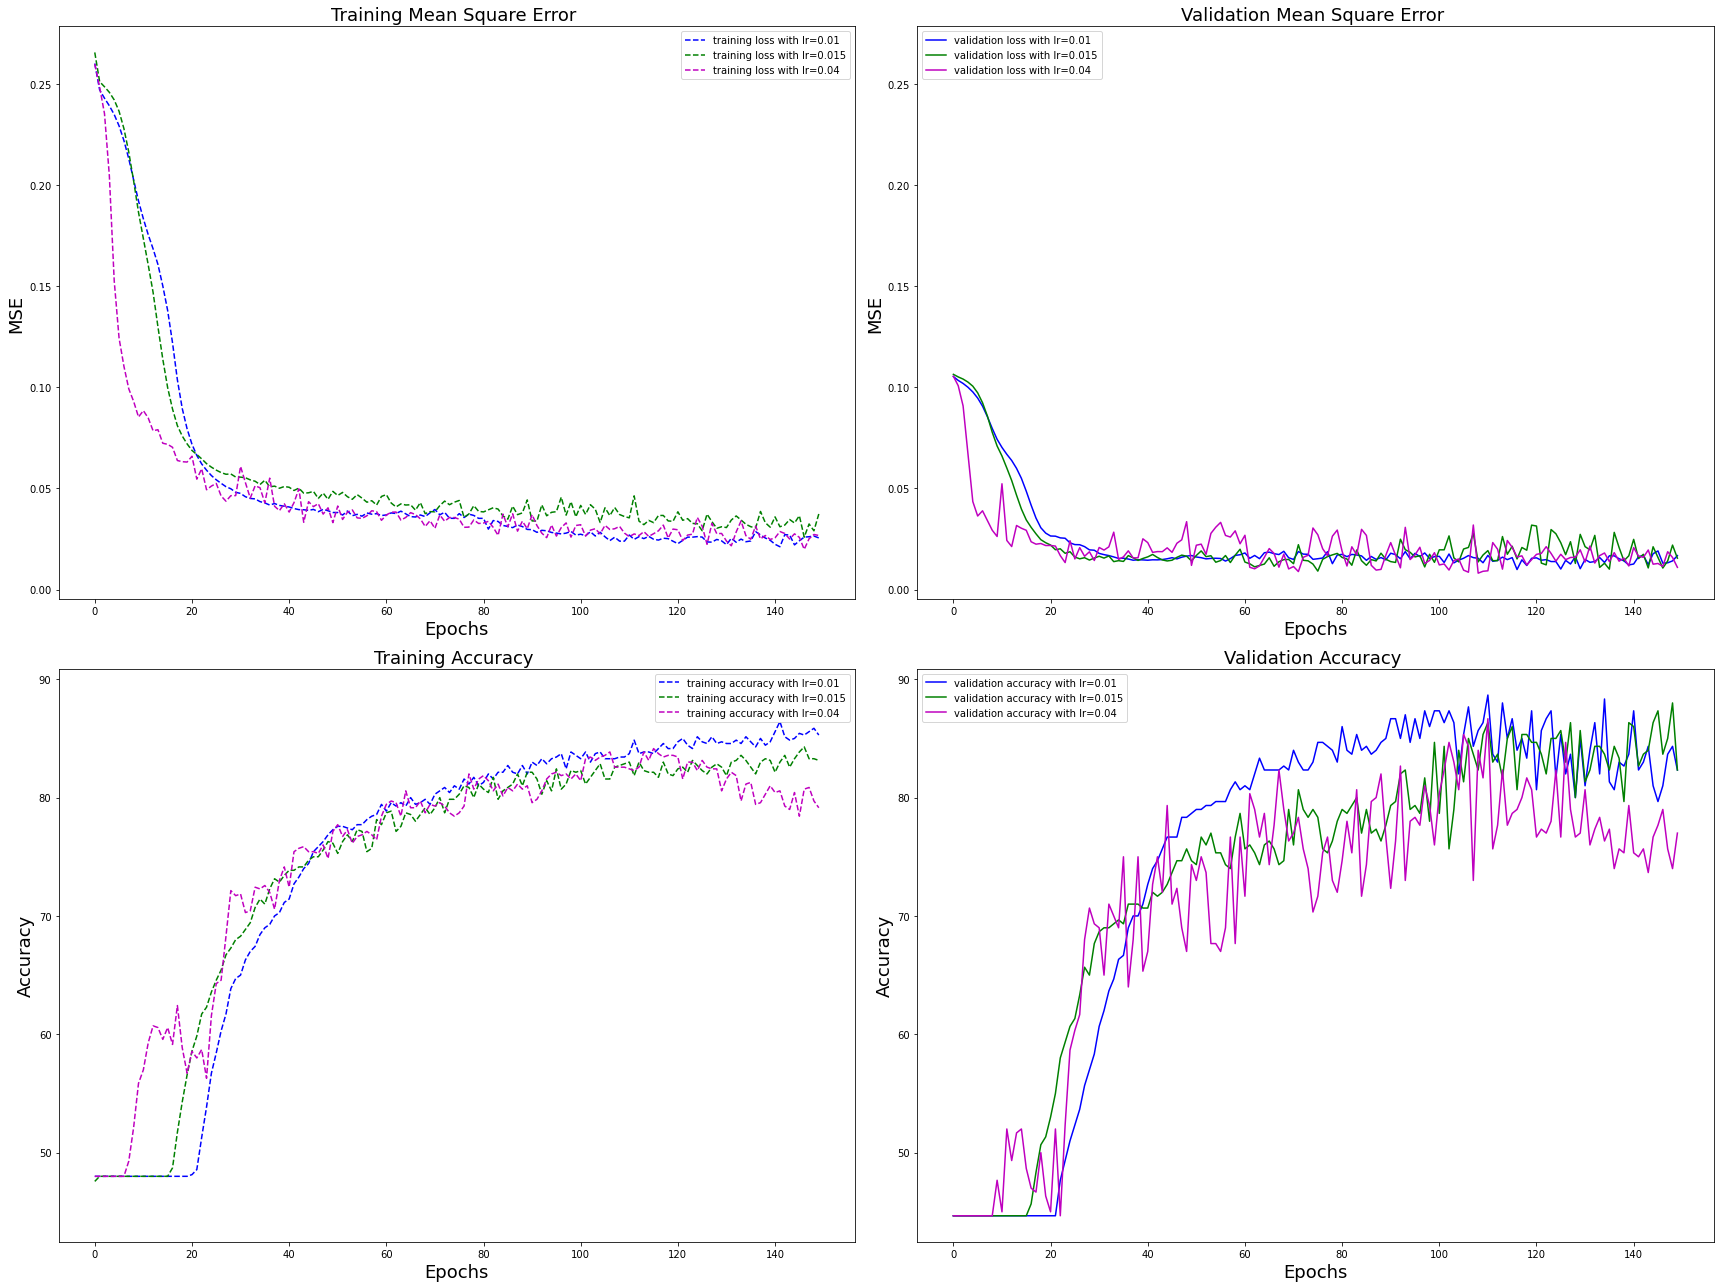

In [41]:
val_plots_results(val_stats,lrs)